In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [5]:
data=pd.read_csv("C:/Users/ADMIN/Desktop/Data Science Assign/MLR/50_Startups.csv")

In [6]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
data.shape

(50, 5)

In [10]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [12]:
data.isnull().sum()
#there are no null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [13]:
data[data.duplicated()].shape
#there are no duplicated rows 

(0, 5)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [15]:
#lets rename to avoid errors
data1=data.rename({'R&D Spend':'RDS','Marketing Spend':'MS'},axis=1)

In [16]:
data1.head()

,RDS,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [17]:
#creating dummy variable for state column 

In [18]:
data2=pd.get_dummies(data1,columns=['State'])

In [19]:
data2

,RDS,Administration,MS,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [20]:
#renaming states columns
data3=data2.rename({'State_California':'California','State_Florida':'Florida','State_New York':'NewYork'},axis=1)

In [21]:
data3

,RDS,Administration,MS,Profit,California,Florida,NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [22]:
data3.isna().sum()

RDS               0
Administration    0
MS                0
Profit            0
California        0
Florida           0
NewYork           0
dtype: int64

In [23]:
data3.corr()

,RDS,Administration,MS,Profit,California,Florida,NewYork
RDS,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
MS,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
NewYork,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


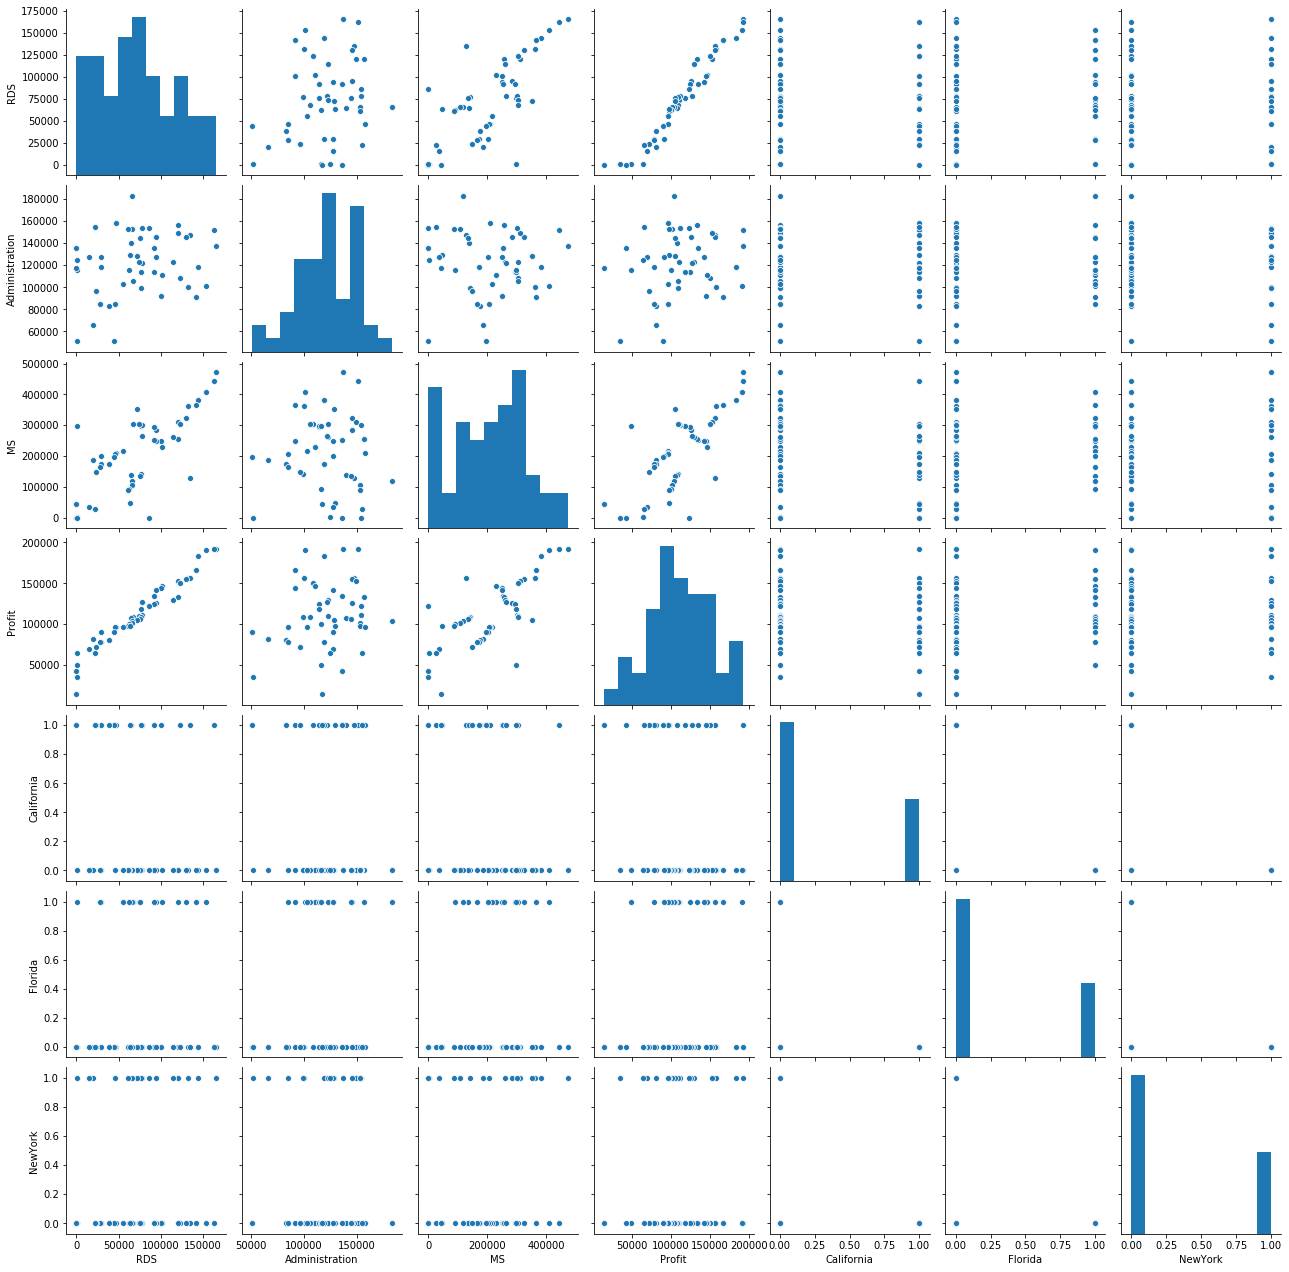

In [24]:
sns.pairplot(data3)

In [25]:
model=smf.ols('Profit~RDS+Administration+MS+California+Florida+NewYork',data=data3).fit()

In [26]:
#coefficient
model.params

Intercept         37633.233317
RDS                   0.806023
Administration       -0.027004
MS                    0.026980
California        12492.110514
Florida           12690.899307
NewYork           12450.223495
dtype: float64

In [27]:
#t-values and p-values
print(model.tvalues,'\n',model.pvalues)

Intercept          7.417409
RDS               17.368580
Administration    -0.517012
MS                 1.573889
California         5.099242
Florida            4.654306
NewYork            5.007401
dtype: float64 
 Intercept         2.807645e-09
RDS               2.578772e-21
Administration    6.077373e-01
MS                1.226769e-01
California        6.942555e-06
Florida           2.992503e-05
NewYork           9.409010e-06
dtype: float64


In [28]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [29]:
sl_A=smf.ols('Profit~Administration',data=data3).fit()
print(sl_A.tvalues,'\n',sl_A.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [30]:
sl_M=smf.ols('Profit~MS',data=data3).fit()
print(sl_M.tvalues,'\n',sl_M.pvalues)

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [31]:
sl_am=smf.ols('Profit~Administration+MS',data=data3).fit()
print(sl_am.tvalues,'\n',sl_am.pvalues)

Intercept         1.142741
Administration    2.467779
MS                8.281039
dtype: float64 
 Intercept         2.589341e-01
Administration    1.729198e-02
MS                9.727245e-11
dtype: float64


# calculating vif

In [33]:
rsq_rds=smf.ols('RDS~Administration+MS+California+Florida+NewYork',data=data3).fit().rsquared
vif_rds = 1/(1-rsq_rds)

rsq_a=smf.ols('Administration~RDS+MS+California+Florida+NewYork',data=data3).fit().rsquared
vif_a = 1/(1-rsq_a)

rsq_ms=smf.ols('MS~RDS+Administration+California+Florida+NewYork',data=data3).fit().rsquared
vif_ms = 1/(1-rsq_ms)

rsq_c=smf.ols('California~RDS+Administration+MS+Florida+NewYork',data=data3).fit().rsquared
vif_c= 1/(1-rsq_c)

rsq_f=smf.ols('Florida~RDS+Administration+MS+California+NewYork',data=data3).fit().rsquared
vif_f = 1/(1-rsq_f)

rsq_ny=smf.ols('NewYork~RDS+Administration+MS+California+Florida',data=data3).fit().rsquared
vif_ny = 1/(1-rsq_ny)

#storing vif values in datafrme
d1={'variables':['RDS','Administration','MS','California','Florida','NewYork'],'vif':[vif_rds,vif_a,vif_ms,vif_c,vif_f,vif_ny]}
vif_frame=pd.DataFrame(d1)
vif_frame


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


,variables,vif
0,RDS,2.495511
1,Administration,1.177766
2,MS,2.416797
3,California,inf
4,Florida,inf
5,NewYork,inf


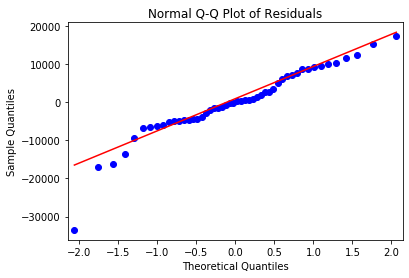

In [34]:
#residual analysis
#test for normality of residuals
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q Plot of Residuals")
plt.show()

In [35]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [36]:
#residual plot for homoscedacity
def get_standardized_values( vals ):
    return(vals-vals.mean())/vals.std()

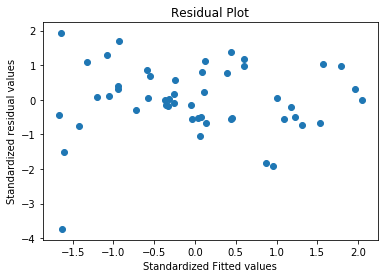

In [38]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

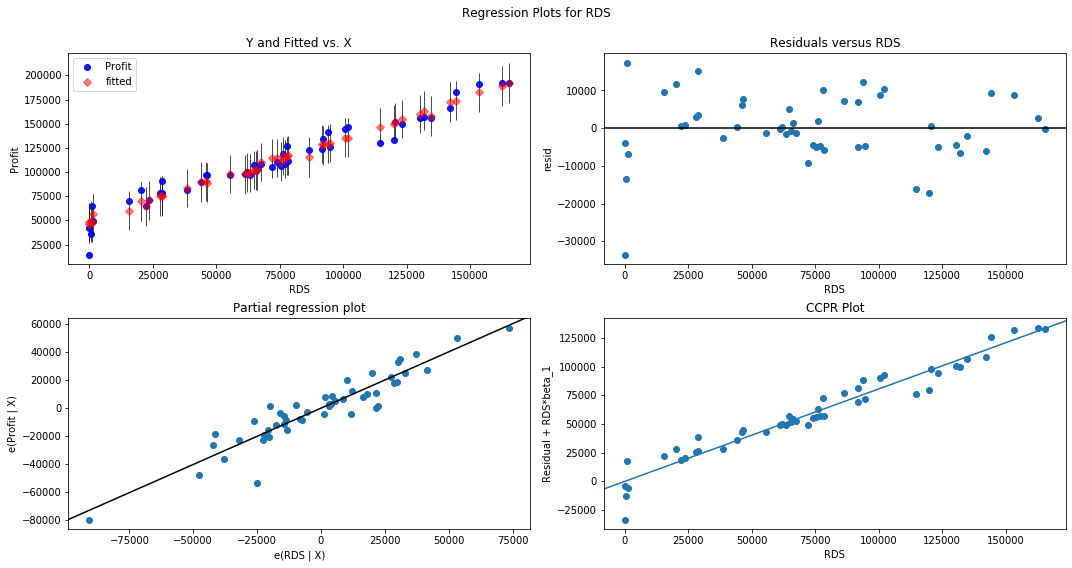

In [39]:
#residual vs regressors
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

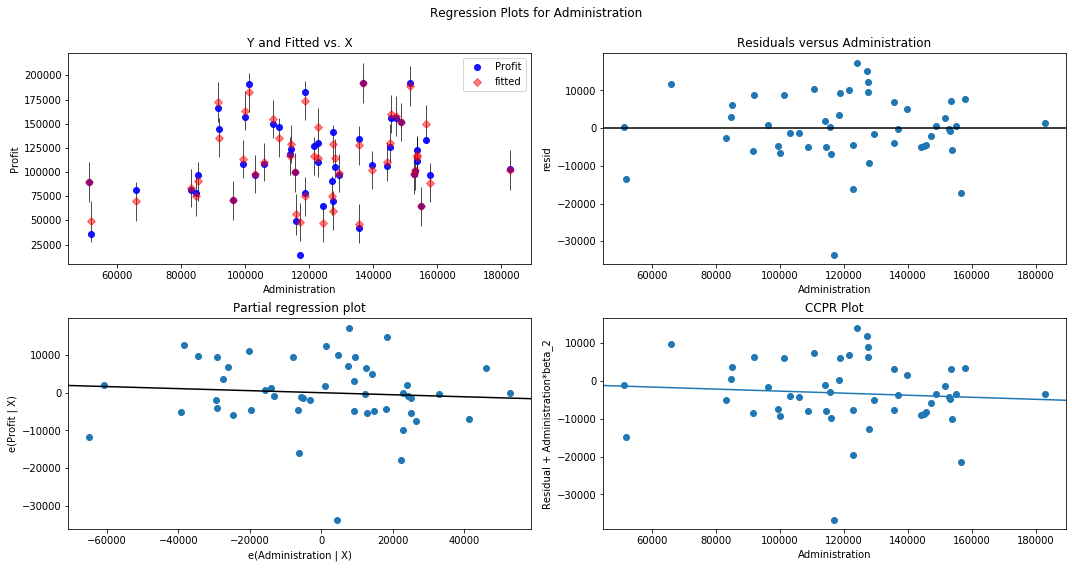

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

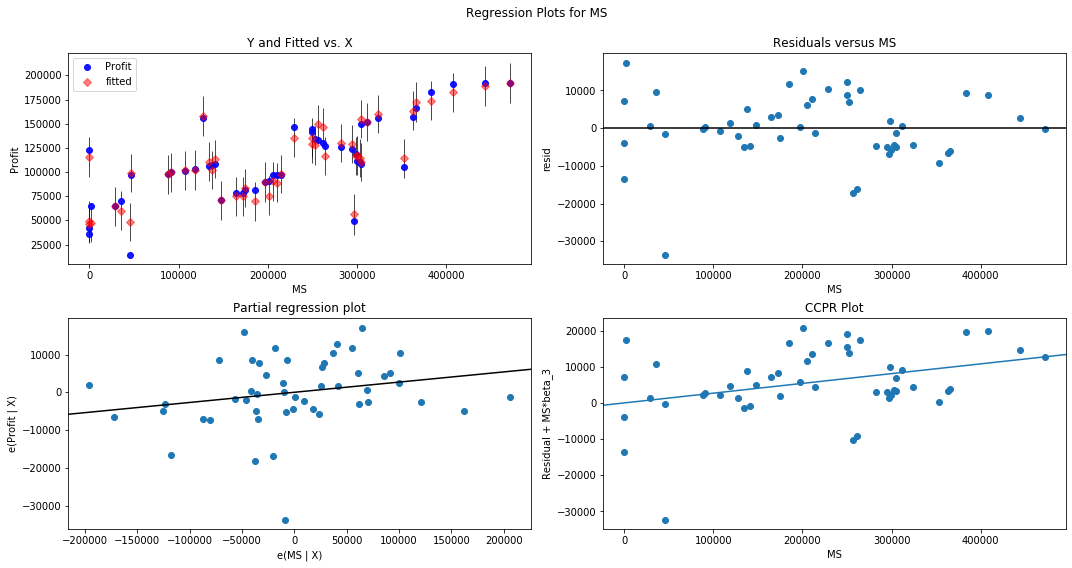

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

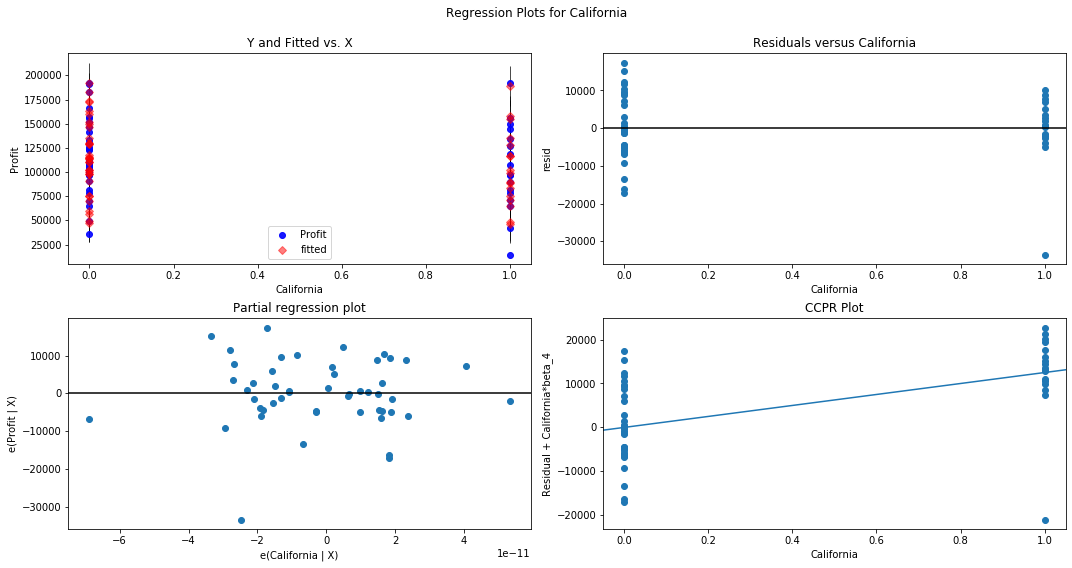

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "California", fig=fig)
plt.show()

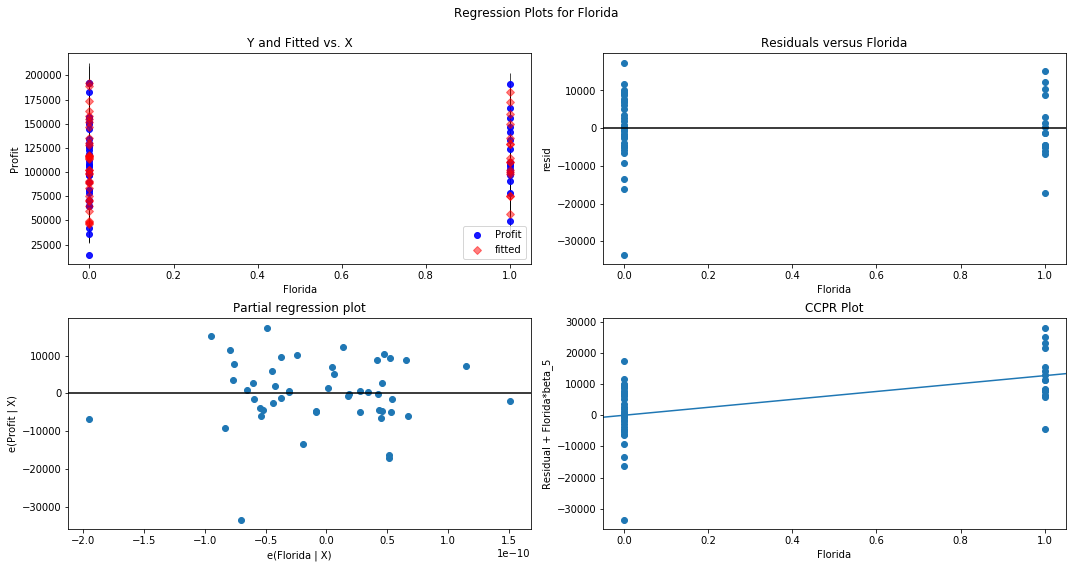

In [44]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Florida", fig=fig)
plt.show()

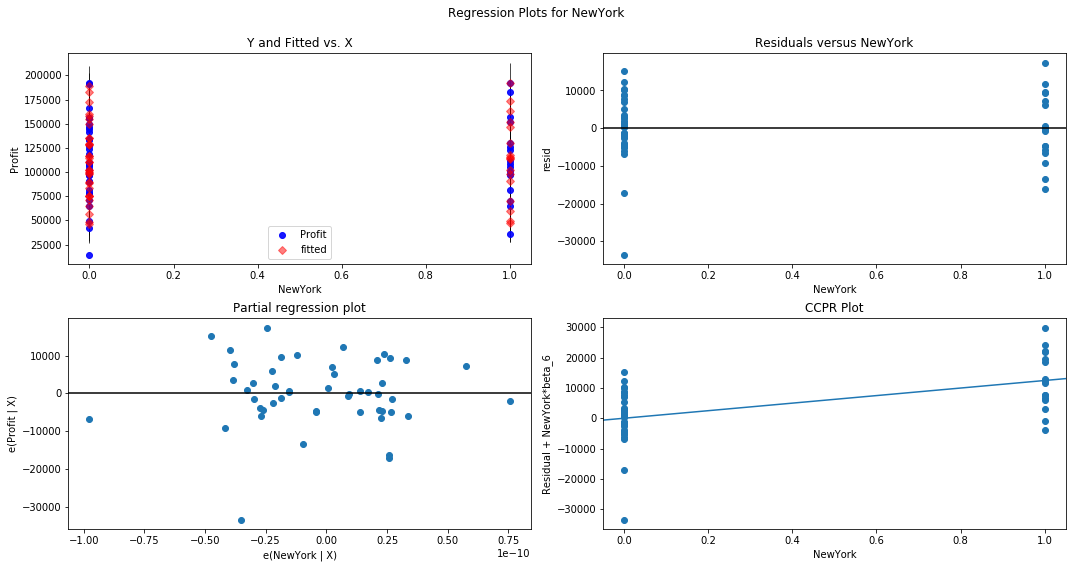

In [45]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "NewYork", fig=fig)
plt.show()

In [46]:
#Model Deletion Diagnostics
#Detecting Influencers/Outliers
#Cook’s Distance

In [47]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


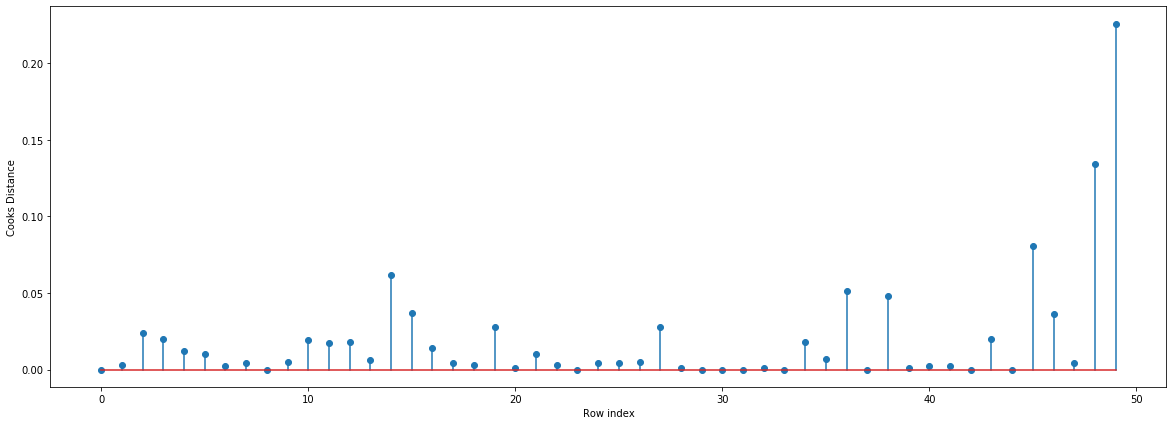

In [48]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [49]:
(np.argmax(c),np.max(c))

(49, 0.22625094501509285)

In [50]:
#we can see that the value is < 1 so we can accept this model
#we also can remove the variables"California","Florida and "NewYork" as they show straigt line in partial regression plot

In [51]:
fmodel=smf.ols('Profit~RDS+Administration+MS',data=data3).fit()

In [52]:
(fmodel.rsquared,fmodel.aic)

(0.9507459940683246, 1058.7714985998055)

In [53]:
fmodeln=smf.ols('Profit~RDS+Administration+MS+California+Florida+NewYork',data=data3).fit()

In [54]:
(fmodeln.rsquared,fmodel.aic)

(0.9507524843355148, 1058.7714985998055)

In [55]:
#as both aic scores are same but when we include the variables "California","Florida and "NewYork" 
#we can see that the rsquare value is a bit higher so we can include them.
